In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Open and replace 'D' by 'E' for good interpretation of numbers
with open("Li7testBS.dep") as f:
    lines = [line.replace('D', 'E') for line in f]

# Create a DataFrame with the modified lines
from io import StringIO
data = StringIO("".join(lines))

# Read the data separated by white spaces
df = pd.read_csv(data, sep=r'\s+', header=None)
assert df.shape[1] == 4, f"Error: el DataFrame tiene {df.shape[1]} columnas, se esperaban 4."

# Define names of columns
df.columns = ['E_MeV', 'd1', 'd2', 'd3']

# d1 : phaseshift (in radian)
# d2 : numerical derivative of the phaseshift with energy, obtained with a Simpson method (in rad/MeV)
# d3 : function of the phaseshift that enables one to infer the scattering lenth ( -tan(delta_lj)/k^(2l+1) )

df

,E_MeV,d1,d2,d3
0,3.01,-0.697134,-0.211581,6.792620
1,3.02,-0.699248,-0.211196,6.787987
2,3.03,-0.701358,-0.210812,6.783395
3,3.04,-0.703464,-0.210429,6.778843
4,3.05,-0.705567,-0.210047,6.774332
...,...,...,...,...
1495,17.96,-2.200354,-0.055520,-0.764014
1496,17.97,-2.200909,-0.055492,-0.762487
1497,17.98,-2.201464,-0.055465,-0.760964
1498,17.99,-2.202018,-0.055438,-0.759445


Text(0.5, 1.0, 'Phaseshift in degrees')

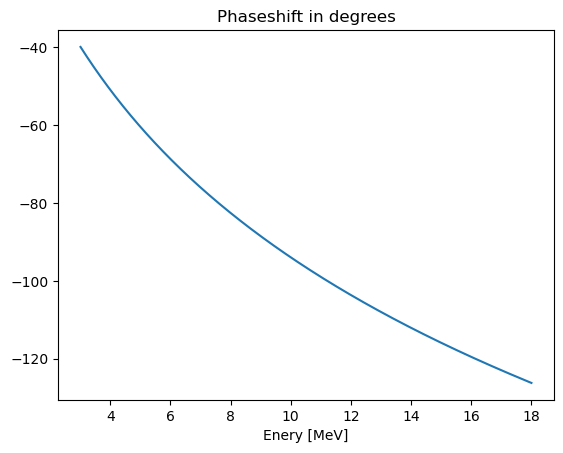

In [3]:
plt.plot(df["E_MeV"], df["d1"]*180/np.pi)
plt.xlabel("Enery [MeV]")
plt.title("Phaseshift in degrees")

Text(0.5, 1.0, 'Numerical $d\\delta / dE$ [rad/MeV]')

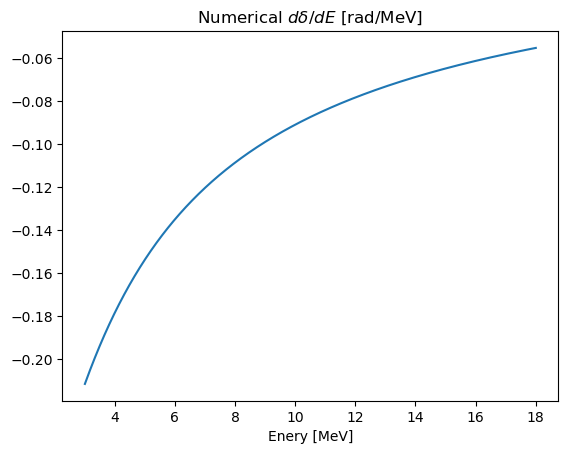

In [4]:
plt.plot(df["E_MeV"], df["d2"])
plt.xlabel("Enery [MeV]")
plt.title(r"Numerical $d\delta / dE$ [rad/MeV]")

Text(0, 0.5, '$-tan(\\delta_{lj})/k^{2l+1}$')

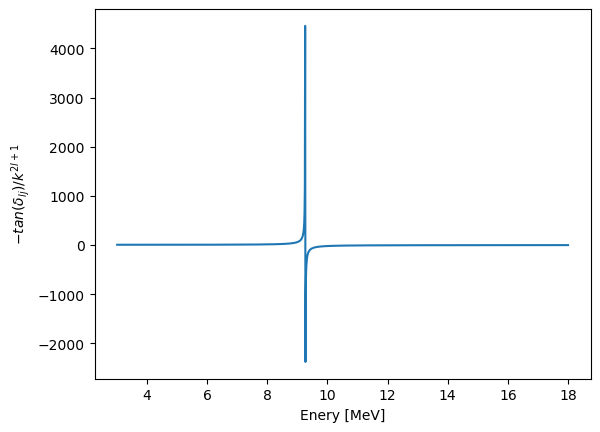

In [5]:
plt.plot(df["E_MeV"], df["d3"])
plt.xlabel("Enery [MeV]")
plt.ylabel(r"$-tan(\delta_{lj})/k^{2l+1}$")